In [1]:
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step

In [3]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [4]:
X_test.shape, y_test.shape

((10000, 28, 28), (10000,))

label:  5


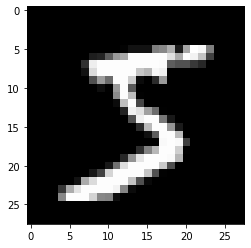

In [6]:
print("label: ", y_train[0])
plt.imshow(X_train[0], cmap='gray')

In [7]:
X_train = X_train[:20000]
y_train = y_train[:20000]
X_train.shape, y_train.shape

((20000, 28, 28), (20000,))

In [8]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_train.shape

(20000, 784)

In [9]:
X_test = X_test.reshape(X_test.shape[0], -1)
X_test.shape

(10000, 784)

In [10]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [11]:
to_categorical(y_train)[:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [12]:
Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)

In [13]:
Y_train.shape, Y_test.shape

((20000, 10), (10000, 10))

# modeling

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

In [20]:
model = Sequential()

model.add(Dense(units=64, input_dim=784, activation='sigmoid'))
model.add(Dense(units=128, activation='sigmoid'))
model.add(Dense(units=128, activation='sigmoid'))
model.add(Dense(units=10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=optimizers.SGD(lr=0.001),
              metrics=['accuracy'])

In [21]:
hist = model.fit(X_train, Y_train, epochs=20, validation_data=(X_test, Y_test), verbose=2)

Epoch 1/20
625/625 - 1s - loss: 2.3363 - accuracy: 0.1102 - val_loss: 2.2941 - val_accuracy: 0.1400
Epoch 2/20
625/625 - 1s - loss: 2.2904 - accuracy: 0.1302 - val_loss: 2.2872 - val_accuracy: 0.1195
Epoch 3/20
625/625 - 1s - loss: 2.2849 - accuracy: 0.1243 - val_loss: 2.2824 - val_accuracy: 0.1266
Epoch 4/20
625/625 - 2s - loss: 2.2799 - accuracy: 0.1337 - val_loss: 2.2773 - val_accuracy: 0.1295
Epoch 5/20
625/625 - 1s - loss: 2.2749 - accuracy: 0.1453 - val_loss: 2.2723 - val_accuracy: 0.1226
Epoch 6/20
625/625 - 1s - loss: 2.2699 - accuracy: 0.1464 - val_loss: 2.2674 - val_accuracy: 0.1331
Epoch 7/20
625/625 - 2s - loss: 2.2648 - accuracy: 0.1607 - val_loss: 2.2622 - val_accuracy: 0.1640
Epoch 8/20
625/625 - 1s - loss: 2.2596 - accuracy: 0.1843 - val_loss: 2.2569 - val_accuracy: 0.1878
Epoch 9/20
625/625 - 2s - loss: 2.2542 - accuracy: 0.2051 - val_loss: 2.2513 - val_accuracy: 0.1928
Epoch 10/20
625/625 - 2s - loss: 2.2485 - accuracy: 0.2201 - val_loss: 2.2454 - val_accuracy: 0.2588

Text(0, 0.5, 'accuracy')

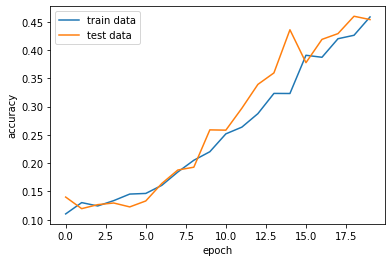

In [23]:
plt.plot(hist.history['accuracy'], label='train data')
plt.plot(hist.history['val_accuracy'], label='test data')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('accuracy')

# 가중치 초기화

In [24]:
model = Sequential()

model.add(Dense(units=64, input_dim=784, activation='sigmoid', kernel_initializer='he_normal'))
model.add(Dense(units=128, activation='sigmoid', kernel_initializer='he_normal'))
model.add(Dense(units=128, activation='sigmoid', kernel_initializer='he_normal'))
model.add(Dense(units=10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=optimizers.SGD(lr=0.001),
              metrics=['accuracy'])

hist = model.fit(X_train, Y_train, epochs=20, validation_data=(X_test, Y_test))

Epoch 1/20
625/625 [==============================] - 2s 3ms/step - loss: 2.3749 - accuracy: 0.1610 - val_loss: 2.2812 - val_accuracy: 0.1398

Text(0, 0.5, 'accuracy')

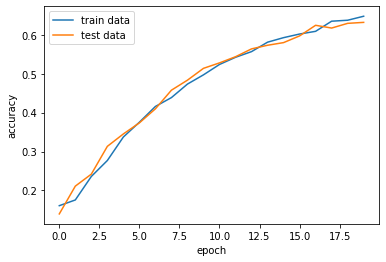

In [25]:
plt.plot(hist.history['accuracy'], label='train data')
plt.plot(hist.history['val_accuracy'], label='test data')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('accuracy')

# 활성화 함수

In [26]:
model = Sequential()

model.add(Dense(units=64, input_dim=784, activation='relu'))
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=optimizers.SGD(lr=0.001),
              metrics=['accuracy'])

hist = model.fit(X_train, Y_train, epochs=20, validation_data=(X_test, Y_test))

Epoch 1/20
625/625 [==============================] - 1s 2ms/step - loss: 1.8228 - accuracy: 0.6815 - val_loss: 0.8061 - val_accuracy: 0.7820

Text(0, 0.5, 'accuracy')

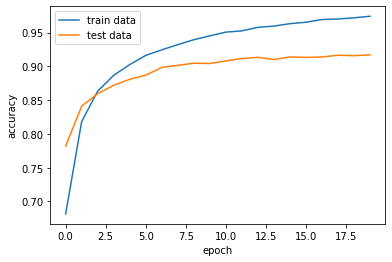

In [27]:
plt.plot(hist.history['accuracy'], label='train data')
plt.plot(hist.history['val_accuracy'], label='test data')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('accuracy')

# optimizer

In [34]:
model = Sequential()

model.add(Dense(units=64, input_dim=784, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(units=128, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(units=128, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(units=10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam',
              metrics=['accuracy'])

hist = model.fit(X_train, Y_train, epochs=20, validation_data=(X_test, Y_test))

Epoch 1/20
625/625 [==============================] - 2s 3ms/step - loss: 4.5886 - accuracy: 0.7291 - val_loss: 0.8828 - val_accuracy: 0.8029

Text(0, 0.5, 'accuracy')

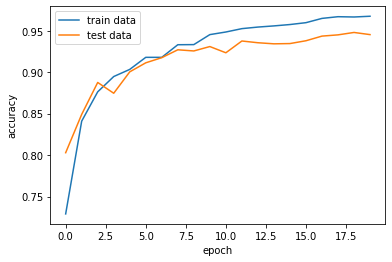

In [35]:
plt.plot(hist.history['accuracy'], label='train data')
plt.plot(hist.history['val_accuracy'], label='test data')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('accuracy')

# 규제 적용

In [38]:
from tensorflow.keras import regularizers

In [39]:
model = Sequential()

model.add(Dense(units=64, input_dim=784, activation='relu',
                kernel_initializer='he_normal', kernel_regularizer=regularizers.l1(1)))
model.add(Dense(units=128, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(units=128, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(units=10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam',
              metrics=['accuracy'])

hist = model.fit(X_train, Y_train, epochs=20, validation_data=(X_test, Y_test))

Epoch 1/20
625/625 [==============================] - 2s 3ms/step - loss: 180.2711 - accuracy: 0.5598 - val_loss: 14.7960 - val_accuracy: 0.6219

Text(0, 0.5, 'accuracy')

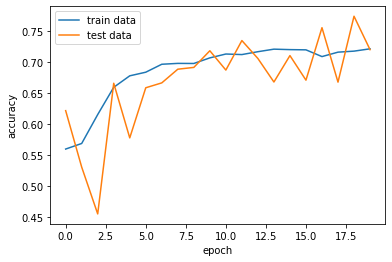

In [40]:
plt.plot(hist.history['accuracy'], label='train data')
plt.plot(hist.history['val_accuracy'], label='test data')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('accuracy')